In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

In [42]:
msft = pdr.get_data_yahoo('MSFT', start='2013-1-1', end='2018-12-31')['Close']
amzn = pdr.get_data_yahoo('AMZN', start='2013-1-1', end='2018-12-31')['Close']
fb = pdr.get_data_yahoo('FB', start='2013-1-1', end='2018-12-31')['Close']
bofa = pdr.get_data_yahoo('BAC', start='2013-1-1', end='2018-12-31')['Close']
port_1 = pd.concat([msft,amzn],axis=1)
port_1.columns=['Microsoft','Amazon']
port_2 = pd.concat([fb,bofa],axis=1)
port_2.columns=['Facebook','Bank of America']

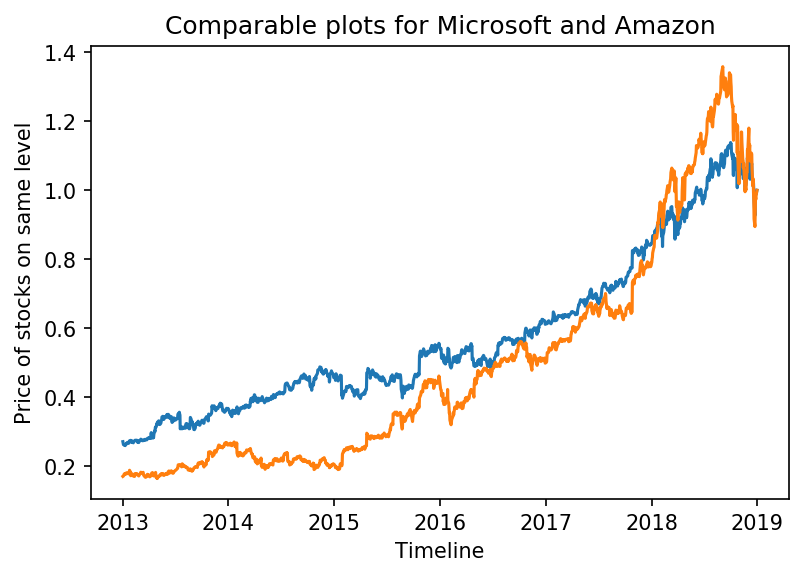

In [54]:
comparable_port1=port_1/port_1.iloc[-1]
plt.plot(comparable_port1)
plt.title('Comparable plots for Microsoft and Amazon')
plt.ylabel('Price of stocks on same level')
plt.xlabel('Timeline')
plt.rcParams['figure.dpi']=150;

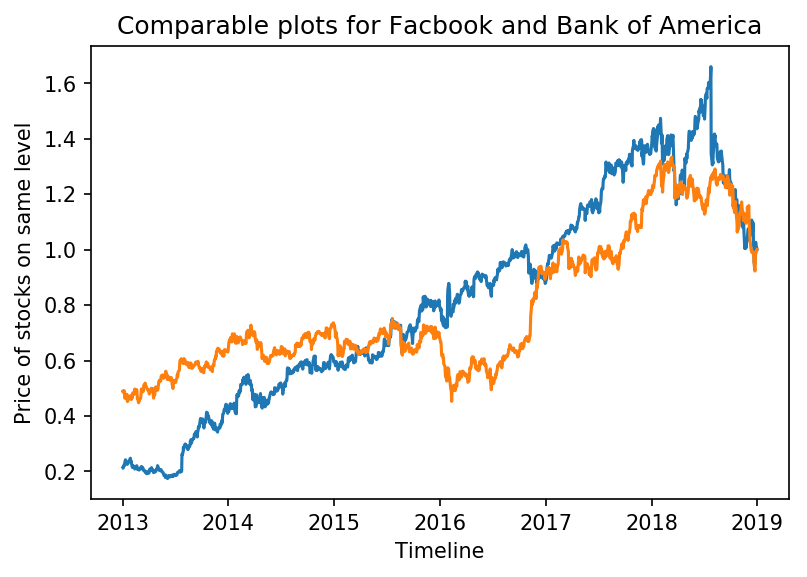

In [55]:
comparable_port2=port_2/port_2.iloc[-1]
plt.plot(comparable_port2)
plt.title('Comparable plots for Facbook and Bank of America')
plt.ylabel('Price of stocks on same level')
plt.xlabel('Timeline');

In [45]:
port1_comp_ret = (pow(port_1.iloc[-1]/port_1.iloc[0],1/1234) - 1)*250 #compounded annual return assuming 250 days/year
port2_comp_ret = (pow(port_2.iloc[-1]/port_2.iloc[0],1/1234) - 1)*250

In [46]:
wghts = np.array([60,40]) # randomly assigned weights for two stock portfolio
wght_ret1 = np.dot(port1_comp_ret,wghts) # weighted returns for portfolio 1
wght_ret2 = np.dot(port2_comp_ret,wghts) # weighted returns for portfolio 2
print(wght_ret1, wght_ret2)

30.144700944334524 24.587878428232735


In [47]:
port1_daily_ret=port_1.pct_change()[1:] # calculating percentage returns
port2_daily_ret=port_2.pct_change()[1:]
print(port1_daily_ret.head())
print(port2_daily_ret.head())

            Microsoft    Amazon
Date                           
2013-01-03  -0.013396  0.004547
2013-01-04  -0.018716  0.002592
2013-01-07  -0.001870  0.035925
2013-01-08  -0.005245 -0.007748
2013-01-09   0.005650 -0.000113
            Facebook  Bank of America
Date                                 
2013-01-03 -0.008214        -0.005819
2013-01-04  0.035650         0.012542
2013-01-07  0.022949        -0.001651
2013-01-08 -0.012237        -0.009098
2013-01-09  0.052650        -0.045910


In [48]:
port1_covar = port1_daily_ret.cov() *250 # calculating annual covariance assuming 250 days per year 
port2_covar = port2_daily_ret.cov() *250

In [49]:
port1_risk = np.sqrt(np.dot(wghts.T,(np.dot(port1_covar,wghts)))) # using matrices to calculate portfolio risk
port2_risk = np.sqrt(np.dot(wghts.T,(np.dot(port2_covar,wghts)))) # very important to know the formula and matrix multiplication
# rule

In [50]:
print(port1_risk)
print(port2_risk)

22.51318326209241
24.683095596235386


In [51]:
rf = 0.03 #assuming risk free to be 3%
sharpe_1 = (wght_ret1 - rf)/port1_risk # sharpe formula 
sharpe_2 = (wght_ret2 - rf)/port2_risk

print("Sharpe ratio for portfolio 1",sharpe_1)
print("Sharpe ratio for portfolio 2",sharpe_2)

Sharpe ratio for portfolio 1 1.3376473950283836
Sharpe ratio for portfolio 2 0.9949270071286459
